In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data=pd.read_csv("Delhi House Prediction.csv")
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [87]:
data.shape

(1259, 11)

In [88]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [117]:
data['Parking'].fillna(0)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1254    3.0
1255    3.0
1256    3.0
1257    1.0
1258    1.0
Name: Parking, Length: 1259, dtype: float64

In [118]:
data['Parking'].fillna(data['Parking'].mean(), inplace = True)
data['Parking']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1254    3.0
1255    3.0
1256    3.0
1257    1.0
1258    1.0
Name: Parking, Length: 1259, dtype: float64

In [119]:
data.groupby(['BHK','Area'])['Parking'].mean()

BHK  Area  
1    50.0      13.666667
     70.0       1.000000
     198.0      1.000000
     200.0      1.000000
     210.0     39.000000
                 ...    
6    2800.0     2.000000
     4050.0     1.000000
     5500.0     1.000000
7    2970.0     1.000000
10   1200.0     2.000000
Name: Parking, Length: 412, dtype: float64

In [120]:
data['Parking'].fillna(data.groupby(['BHK','Area'])['Parking'].transform('mean'))

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1254    3.0
1255    3.0
1256    3.0
1257    1.0
1258    1.0
Name: Parking, Length: 1259, dtype: float64

In [121]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [122]:
data.groupby('Furnishing').sum()

,Area,BHK,Bathroom,Parking,Price,Type,Per_Sqft
Furnishing,,,,,,,
-1,6.090000e+03,16,11.000000,8.742251,68400000,-5.0,145630.0
0,2.352956e+05,533,445.000000,265.806688,3206460000,79.0,2549248.0
1,1.109949e+06,2025,1879.000000,1181.162316,16125630000,405.0,10879821.0
2,4.949295e+05,947,883.112172,981.162316,7424650000,177.0,5309071.0


In [123]:
data['Furnishing'] = data['Furnishing'].astype('category')
data['Furnishing'] = data['Furnishing'].cat.codes
data['Furnishing']

0       2
1       2
2       1
3       2
4       2
       ..
1254    3
1255    2
1256    2
1257    3
1258    3
Name: Furnishing, Length: 1259, dtype: int8

In [124]:
data['Furnishing'] = data['Furnishing'].fillna(data.groupby(['BHK','Area'])['Furnishing'].transform('median'))
data['Furnishing']

0       2
1       2
2       1
3       2
4       2
       ..
1254    3
1255    2
1256    2
1257    3
1258    3
Name: Furnishing, Length: 1259, dtype: int8

In [125]:
data.groupby('Type').sum()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Per_Sqft
Type,,,,,,,
-1,6.090000e+03,16,11.000000,0.0,8.742251,68400000,145630.0
0,7.788694e+05,1592,1427.112172,1268.0,1434.033442,10839400000,7643688.0
1,1.061305e+06,1913,1780.000000,1420.0,994.097879,15917340000,11094452.0


In [126]:
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes
data['Type']

0       2
1       1
2       1
3       2
4       2
       ..
1254    2
1255    2
1256    2
1257    2
1258    2
Name: Type, Length: 1259, dtype: int8

In [127]:
data['Type'] = data['Type'].fillna(data.groupby(['BHK','Area'])['Type'].transform('median'))
data['Type']

0       2
1       1
2       1
3       2
4       2
       ..
1254    2
1255    2
1256    2
1257    2
1258    2
Name: Type, Length: 1259, dtype: int8

In [128]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [129]:
data.groupby('Bathroom').sum()

,Area,BHK,Furnishing,Parking,Price,Type,Per_Sqft
Bathroom,,,,,,,
1.000000,77171.6027,220,336.0,443.420065,510340000,208.0,1603442.0
2.000000,538543.8444,1352,1153.0,1055.097879,5663530000,807.0,6479236.0
2.556086,3000.0000,2,6.0,3.871126,27000000,2.0,23703.0
3.000000,576391.7800,1108,747.0,529.613377,8286700000,556.0,5942346.0
4.000000,394278.0000,548,303.0,242.935563,6940370000,233.0,3103731.0
5.000000,212120.7526,242,122.0,136.000000,4319100000,97.0,1404749.0
6.000000,23672.0000,34,15.0,18.935563,684400000,9.0,282194.0
7.000000,21086.0000,15,6.0,7.000000,393700000,3.0,44369.0


In [130]:
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace = True)
data['Bathroom']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1254    5.0
1255    2.0
1256    3.0
1257    2.0
1258    3.0
Name: Bathroom, Length: 1259, dtype: float64

In [131]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [132]:
data['Per_Sqft'] = data['Per_Sqft'].bfill()
data['Per_Sqft']

0        6667.0
1        6667.0
2        6667.0
3        6667.0
4        6667.0
         ...   
1254    12916.0
1255    12916.0
1256    12916.0
1257    12916.0
1258    12916.0
Name: Per_Sqft, Length: 1259, dtype: float64

In [133]:
data['Per_Sqft'] = data['Per_Sqft'].ffill()
data['Per_Sqft']

0        6667.0
1        6667.0
2        6667.0
3        6667.0
4        6667.0
         ...   
1254    12916.0
1255    12916.0
1256    12916.0
1257    12916.0
1258    12916.0
Name: Per_Sqft, Length: 1259, dtype: float64

In [134]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [135]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
data1 = data[['Area','BHK','Bathroom','Furnishing','Locality','Parking','Price','Transaction','Type','Per_Sqft']]

In [136]:
data1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,2,Rohini Sector 25,1.0,6500000,New_Property,2,6667.0
1,750.0,2,2.0,2,"J R Designers Floors, Rohini Sector 24",1.0,5000000,New_Property,1,6667.0
2,950.0,2,2.0,1,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Resale,1,6667.0
3,600.0,2,2.0,2,Rohini Sector 24,1.0,4200000,Resale,2,6667.0
4,650.0,2,2.0,2,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,New_Property,2,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3,Chittaranjan Park,3.0,55000000,New_Property,2,12916.0
1255,1050.0,3,2.0,2,Chittaranjan Park,3.0,12500000,Resale,2,12916.0
1256,875.0,3,3.0,2,Chittaranjan Park,3.0,17500000,New_Property,2,12916.0
1257,990.0,2,2.0,3,Chittaranjan Park Block A,1.0,11500000,Resale,2,12916.0


In [137]:
locality=data1.Locality
locality

0                                        Rohini Sector 25
1                  J R Designers Floors, Rohini Sector 24
2                     Citizen Apartment, Rohini Sector 13
3                                        Rohini Sector 24
4       Rohini Sector 24 carpet area 650 sqft status R...
                              ...                        
1254                                    Chittaranjan Park
1255                                    Chittaranjan Park
1256                                    Chittaranjan Park
1257                            Chittaranjan Park Block A
1258                                    Chittaranjan Park
Name: Locality, Length: 1259, dtype: object

In [138]:
pd.get_dummies(locality)


,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,"Vijay Enclave, Mahavir Enclave","Vijay Vihar, Rohini","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
data1=pd.get_dummies(data1, columns = ['Locality'])
data1

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Per_Sqft,"Locality_APL Builder Floor, Greater Kailash 1",...,"Locality_Vijay Enclave, Mahavir Enclave","Locality_Vijay Vihar, Rohini","Locality_Vikram Vihar, Lajpat Nagar","Locality_Vinoba Puri, Lajpat Nagar","Locality_Virat Residency, Dwarka Mor","Locality_Vishwas Nagar, Shahdara","Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
0,800.0,3,2.0,2,1.0,6500000,New_Property,2,6667.0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,2,1.0,5000000,New_Property,1,6667.0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,1,1.0,15500000,Resale,1,6667.0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,2,1.0,4200000,Resale,2,6667.0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,2,1.0,6200000,New_Property,2,6667.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3,3.0,55000000,New_Property,2,12916.0,0,...,0,0,0,0,0,0,0,0,0,0
1255,1050.0,3,2.0,2,3.0,12500000,Resale,2,12916.0,0,...,0,0,0,0,0,0,0,0,0,0
1256,875.0,3,3.0,2,3.0,17500000,New_Property,2,12916.0,0,...,0,0,0,0,0,0,0,0,0,0
1257,990.0,2,2.0,3,1.0,11500000,Resale,2,12916.0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X=data1.drop('Price', axis = 1)
X


,Area,BHK,Bathroom,Furnishing,Parking,Transaction,Type,Per_Sqft,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka",...,"Locality_Vijay Enclave, Mahavir Enclave","Locality_Vijay Vihar, Rohini","Locality_Vikram Vihar, Lajpat Nagar","Locality_Vinoba Puri, Lajpat Nagar","Locality_Virat Residency, Dwarka Mor","Locality_Vishwas Nagar, Shahdara","Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
0,800.0,3,2.0,2,1.0,New_Property,2,6667.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,2,1.0,New_Property,1,6667.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,1,1.0,Resale,1,6667.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,2,1.0,Resale,2,6667.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,2,1.0,New_Property,2,6667.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3,3.0,New_Property,2,12916.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,1050.0,3,2.0,2,3.0,Resale,2,12916.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,875.0,3,3.0,2,3.0,New_Property,2,12916.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,990.0,2,2.0,3,1.0,Resale,2,12916.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:

X=data.iloc[:,:1].values.reshape(1,-1)
X

array([[  800.,   750.,   950., ...,   875.,   990., 11050.]])

In [142]:
y=data.Price
y=y.values
y

array([ 6500000,  5000000, 15500000, ..., 17500000, 11500000, 18500000],
      dtype=int64)

Text(0, 0.5, 'Price')

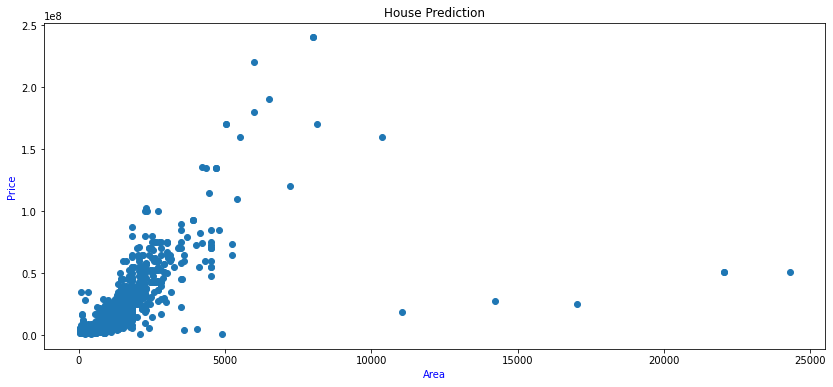

In [143]:
fig,ax = plt.subplots(figsize = (14,6))
plt.scatter(X,y)
plt.show
plt.title("House Prediction")
plt.xlabel("Area", color="b")
plt.ylabel("Price", color="b")

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [1, 1259]

In [82]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [76]:
y_pred = reg.predict(X_test)

NameError: name 'X_test' is not defined

In [36]:
reg.score(X_test,y_test) * 100

NameError: name 'reg' is not defined

In [37]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [85]:
def predict_price(Location,BHK,Bathroom,Parking,sqft):
    
    x=np.zeros(len(X.columns))
    x[0] = BHK
    x[1] = Bathroom
    x[2] = Parking
    x[3] = sqft
        
    return reg.predict([x])[0] 

In [86]:
predict_price('Locality_Vinoba Puri, Lajpat Nagar',10,8.0,4.0,5000.0)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'